<img style="float: right; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="350px" height="180px" /> 


# <font color= 'navy'> EDA - Desempleo en USA -  Parte II</font>
### <font color= #2E9AFE> Ética para la Ciencia de Datos</font>


- <Strong> José Manuel Haces López - 734759</Strong>


- <Strong> Claudia Celeste Castillejos Jáuregui - 735868 </Strong>


- <Strong> Marcela Quintero Perez - 717644 </Strong>


- <Strong> Pablo Ivan Orosco Beltran - 723252 </Strong>


<Strong> Fecha </Strong>:  24 de febrero 2023.


### <font color= #2E9AFE> Apéndice </font>

- Portada.
- Descripción de la base de datos.
- Objetivo.
- Desarrollo.
- Conclusiones.

### <font color= #2E9AFE>2. Descripción de la base de datos </font>

Como segunda parte del proyecto final de Ética para la Ciencia de Datos trabajaremos con otra base de datos que nos proporcionó la maestra con el fin de poner en practica nuestros conocimientos acerca del modelado de datos supervisados.

Este conjunto de datos también contiene datos contiene información en promedio de los ingresos que adquiere un empleado en USA.

Las variables que contiene el dataset son:

    - gender
    - race
    - ResId
    - income_cat
    - educ
    - voter_category
    

### <font color= #2E9AFE>3. Objetivos </font>

 * Conocer cuanto es el ingreso promedio en USA.
 * Identificar las caracteristicas de los perfiles con mayor y menor salario.
 * Analizar el ingreso segregando por grupos (sociales, genero, raza, etc.)

### <font color= #2E9AFE>4. Desarrollo</font>
### <font color= #2E9AFE> EDA </font>

In [1]:
# Librerías
import imblearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Utilidades
from Utils import VariableAnalysis

In [2]:
# 1. Dataset de Desempleo por Grupos
# Cargando CSV
data = pd.read_csv("./Data/Procesado/Nonvoters_Dataset.csv")
data.head()

,RespId,educ,race,gender,income_cat,voter_category
0,470001,College,White,Female,$75-125k,always
1,470002,College,White,Female,$125k or more,always
2,470003,College,White,Male,$125k or more,sporadic
3,470007,Some college,Black,Female,$40-75k,sporadic
4,480008,High school or less,White,Male,$40-75k,always


In [3]:
data.dtypes

RespId             int64
educ              object
race              object
gender            object
income_cat        object
voter_category    object
dtype: object

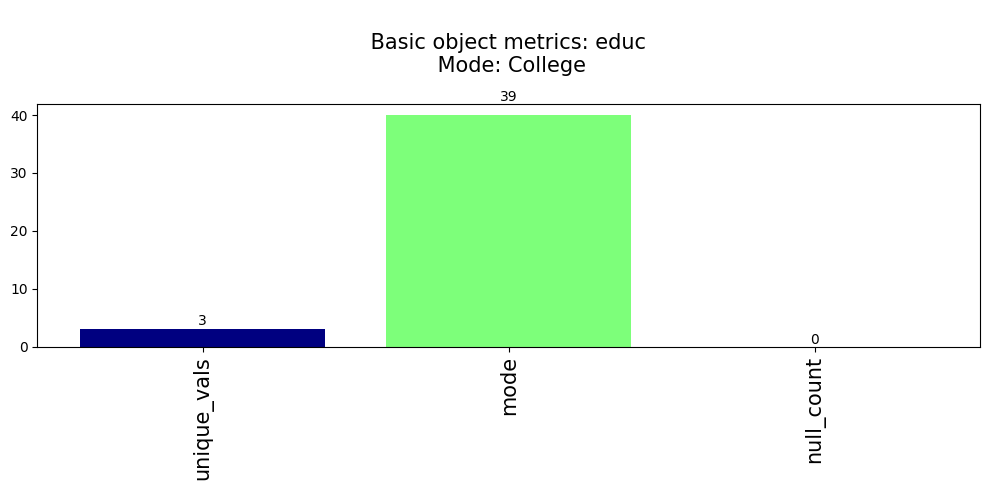

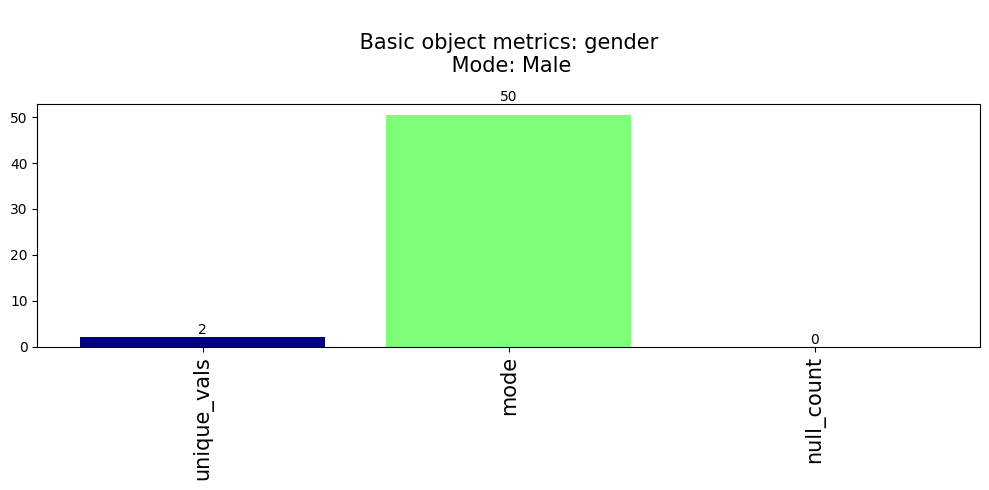

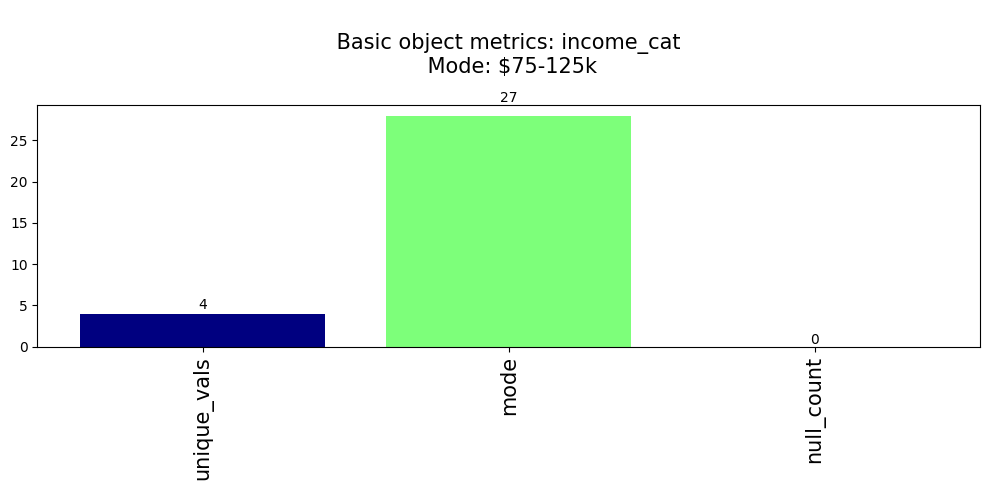

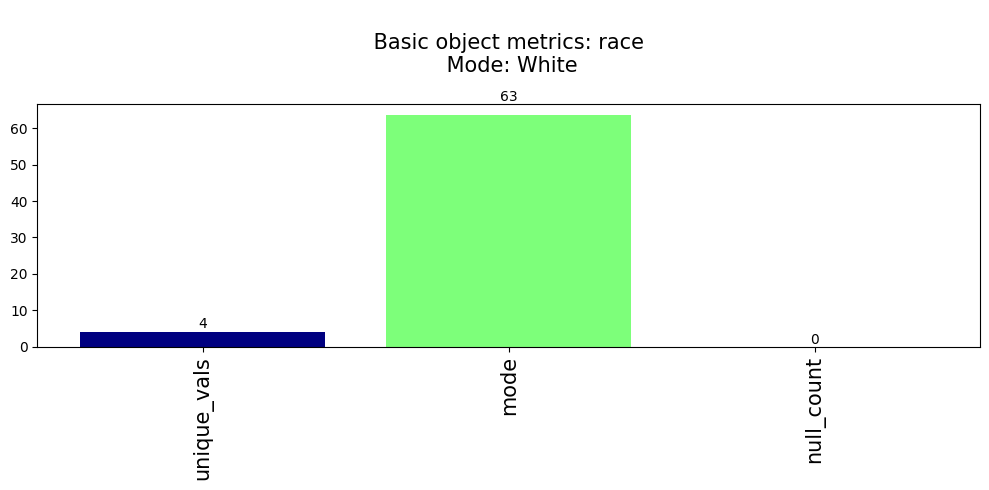

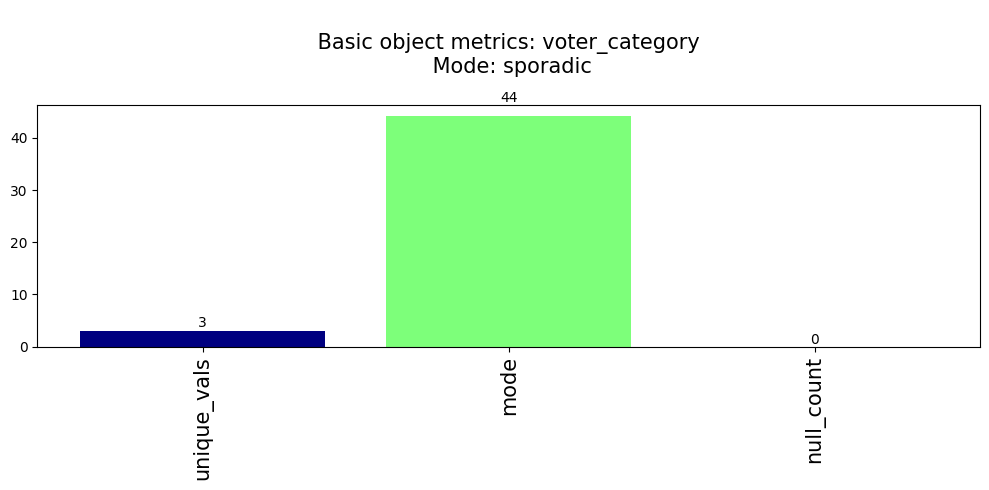

In [4]:
# Análisis Descriptivo
v_analysis = VariableAnalysis(df=data, pattern=[])
numeric_stats, object_stats, cleaned_df = v_analysis.fit_transform()
v_analysis.plot_categorical(df=data, object_stats=object_stats)

In [5]:
#Verificamos que no existan columnas con datos nulos
data.isnull().sum()

RespId            0
educ              0
race              0
gender            0
income_cat        0
voter_category    0
dtype: int64

In [6]:
#Variable de respuesta
data['income_cat'].unique()

array(['$75-125k', '$125k or more', '$40-75k', 'Less than $40k'],
      dtype=object)

In [7]:
#Reemplazamos $125k or more por 1,$75-125k por 2,'$40-75k' por 3 y  Less than $40k por 4 en la variable de respuesta.
data['income_cat'].mask(data['income_cat'] == '$125k or more',1,inplace=True)
data['income_cat'].mask(data['income_cat'] == '$75-125k',2,inplace=True)
data['income_cat'].mask(data['income_cat'] == '$40-75k',3,inplace=True)
data['income_cat'].mask(data['income_cat'] == 'Less than $40k',4,inplace=True)
#Cambiamos el tipo de variable int64
data['income_cat'] =data['income_cat'].astype('int64')

In [8]:
data.head()

,RespId,educ,race,gender,income_cat,voter_category
0,470001,College,White,Female,2,always
1,470002,College,White,Female,1,always
2,470003,College,White,Male,1,sporadic
3,470007,Some college,Black,Female,3,sporadic
4,480008,High school or less,White,Male,3,always


In [9]:
# Seleccionamos solo las variables categóricas
data_categorical = data.select_dtypes(include='object')
data_categorical.head()     

,educ,race,gender,voter_category
0,College,White,Female,always
1,College,White,Female,always
2,College,White,Male,sporadic
3,Some college,Black,Female,sporadic
4,High school or less,White,Male,always


In [10]:
#Hacemos dummies con ellas
dummies= pd.get_dummies(data_categorical)
dummies

,educ_College,educ_High school or less,educ_Some college,race_Black,race_Hispanic,race_Other/Mixed,race_White,gender_Female,gender_Male,voter_category_always,voter_category_rarely/never,voter_category_sporadic
0,1,0,0,0,0,0,1,1,0,1,0,0
1,1,0,0,0,0,0,1,1,0,1,0,0
2,1,0,0,0,0,0,1,0,1,0,0,1
3,0,0,1,1,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5831,0,0,1,0,1,0,0,0,1,1,0,0
5832,0,1,0,0,0,0,1,1,0,0,1,0
5833,1,0,0,0,0,1,0,0,1,0,0,1
5834,0,1,0,1,0,0,0,1,0,1,0,0


In [11]:
#Juntamos las variables anteriores
data2 =data.join(dummies)
data2

,RespId,educ,race,gender,income_cat,voter_category,educ_College,educ_High school or less,educ_Some college,race_Black,race_Hispanic,race_Other/Mixed,race_White,gender_Female,gender_Male,voter_category_always,voter_category_rarely/never,voter_category_sporadic
0,470001,College,White,Female,2,always,1,0,0,0,0,0,1,1,0,1,0,0
1,470002,College,White,Female,1,always,1,0,0,0,0,0,1,1,0,1,0,0
2,470003,College,White,Male,1,sporadic,1,0,0,0,0,0,1,0,1,0,0,1
3,470007,Some college,Black,Female,3,sporadic,0,0,1,1,0,0,0,1,0,0,0,1
4,480008,High school or less,White,Male,3,always,0,1,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,477662,Some college,Hispanic,Male,3,always,0,0,1,0,1,0,0,0,1,1,0,0
5832,477663,High school or less,White,Female,1,rarely/never,0,1,0,0,0,0,1,1,0,0,1,0
5833,488322,College,Other/Mixed,Male,1,sporadic,1,0,0,0,0,1,0,0,1,0,0,1
5834,488325,High school or less,Black,Female,4,always,0,1,0,1,0,0,0,1,0,1,0,0


In [12]:
#Eliminamos las variables categóricas
dfc = data2.drop(columns=['educ','race','gender','voter_category'])
dfc

,RespId,income_cat,educ_College,educ_High school or less,educ_Some college,race_Black,race_Hispanic,race_Other/Mixed,race_White,gender_Female,gender_Male,voter_category_always,voter_category_rarely/never,voter_category_sporadic
0,470001,2,1,0,0,0,0,0,1,1,0,1,0,0
1,470002,1,1,0,0,0,0,0,1,1,0,1,0,0
2,470003,1,1,0,0,0,0,0,1,0,1,0,0,1
3,470007,3,0,0,1,1,0,0,0,1,0,0,0,1
4,480008,3,0,1,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,477662,3,0,0,1,0,1,0,0,0,1,1,0,0
5832,477663,1,0,1,0,0,0,0,1,1,0,0,1,0
5833,488322,1,1,0,0,0,0,1,0,0,1,0,0,1
5834,488325,4,0,1,0,1,0,0,0,1,0,1,0,0


In [13]:
#Sesgo
skewness = round(dfc.skew(),2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"}) 

def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Symmetric distribution'
    else: return 'Moderately skewed'
    
skewness['skewness'] = skewness.apply(f, axis=1)#axis=1 significa a todas los columnas

skewness

,value,skewness
RespId,1.61,Highly Skewed
income_cat,0.04,Symmetric distribution
educ_College,0.41,Symmetric distribution
educ_High school or less,0.83,Moderately skewed
educ_Some college,0.91,Moderately skewed
race_Black,1.86,Highly Skewed
race_Hispanic,2.08,Highly Skewed
race_Other/Mixed,3.52,Highly Skewed
race_White,-0.56,Moderately skewed
gender_Female,0.02,Symmetric distribution


In [14]:
from sklearn.model_selection import train_test_split
#Ahora separamos X y Y
X = dfc.drop(columns='income_cat', axis=0)
Y = dfc['income_cat']

#Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                  test_size = 0.2,
                                                  random_state=42)

In [15]:
#Normalizamos X_train y X_test de los datos 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\Castillejos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


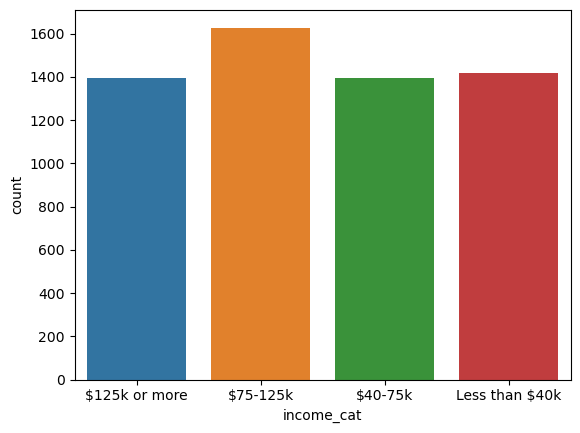

In [17]:
#Graficar >50K vs <=50K.
nuevo = dfc.copy()
nuevo['income_cat']=dfc['income_cat']
g = sns.countplot(nuevo['income_cat'])
g.set_xticklabels(['$125k or more','$75-125k', '$40-75k', 'Less than $40k'])
plt.show()

Las clases  se encuentran un tanto imbaleanceadas por lo tanto utilizaremos el método de sobremuestreo (Synthetic Minority Oversampling Technique) SMOTE.

Text(0.5, 1.0, 'Variable de salida')

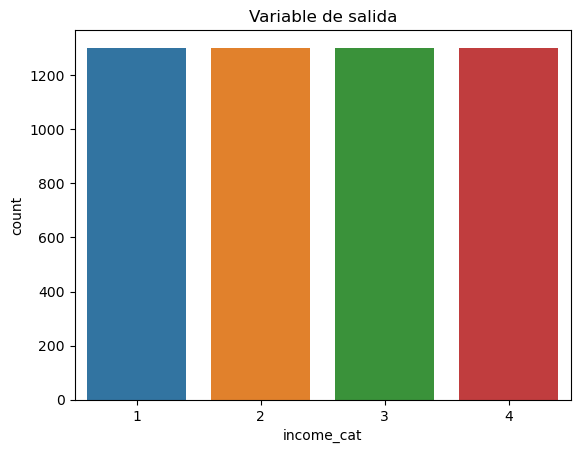

In [18]:
#Balanceamos los datos de salida usando algoritmo de SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
sns.countplot(x=y_train_res).set_title("Variable de salida")

In [19]:
#Conocemos todas las variables que tenemos 
X.columns.values

array(['RespId', 'educ_College', 'educ_High school or less',
       'educ_Some college', 'race_Black', 'race_Hispanic',
       'race_Other/Mixed', 'race_White', 'gender_Female', 'gender_Male',
       'voter_category_always', 'voter_category_rarely/never',
       'voter_category_sporadic'], dtype=object)